In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import re

peserta_didik = pd.read_csv('peserta_didik_202301040920_01.csv', delimiter=';')
peserta_didik

C:\Users\Owen\AppData\Local\Temp\ipykernel_10584\58075390.py:10: DtypeWarning: Columns (1,7,13,16,17,21,23,25,30,32,35,37,38,42,44,45,47,49,51,53,54,56,58,60,62,63,65,67,69,71,73,77,80,81,83,85,87,94,95,97,99,101,102,103,104,105,106,107,108,111,114,117,120,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  peserta_didik = pd.read_csv('peserta_didik_202301040920_01.csv', delimiter=';')


,peserta_didik_id,semester_id,sekolah_id,rombongan_belajar_id,anggota_rombel_id,jenis_kelamin,nik,no_kk,tempat_lahir,tanggal_lahir,...,create_date_peserta_didik_longitudinal,last_update_peserta_didik_longitudinal,soft_delete_peserta_didik_longitudinal,create_date_rombongan_belajar,last_update_rombongan_belajar,soft_delete_rombongan_belajar,flag_update,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,0A281D5F-866E-498B-957C-2B5F82A121F5,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,L,347112,NaN,YOGYAKARTA,05/03/1999,...,2020-01-13 08:01:22.000,2020-01-17 00:22:45.317,0,2022-09-08 09:12:03.807,2022-09-08 09:12:03.810,0,0.0,NaN,NaN,NaN
1,95DB7458-C62B-4F5B-82F2-05E8E4DBFC3F,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,P,331025,NaN,KLATEN,07/05/2002,...,2020-09-08 10:09:39.000,2020-09-09 06:11:56.683,0,2022-09-13 21:45:28.827,2022-09-13 21:45:28.837,0,0.0,NaN,NaN,NaN
2,F78B6B83-E3FE-4A1D-A666-09A9954CBCD9,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,P,347102,NaN,YOGYAKARTA,18/05/2000,...,2019-04-11 01:04:50.000,2019-04-12 05:16:35.750,0,2022-09-19 09:00:36.757,2022-09-19 09:00:36.760,0,0.0,NaN,NaN,NaN
3,13E84005-4489-436C-8DB2-08B7F7757F31,20221.0,FA76788A-D340-4658-BB6C-3B403F9261F7,NaN,NaN,P,351807,NaN,Nganjuk,14/03/2000,...,2018-10-24 11:10:26.000,2018-10-29 08:36:37.620,0,2022-07-08 09:51:55.927,2022-07-08 09:51:55.927,0,0.0,NaN,NaN,NaN
4,B2D82B0A-F4CA-4729-B78E-31398DD5F01A,20221.0,FA76788A-D340-4658-BB6C-3B403F9261F7,NaN,NaN,P,127121,NaN,MEDAN,23/09/1997,...,2020-10-14 08:10:44.000,2020-11-20 12:32:43.023,0,2022-07-08 09:10:19.867,2022-07-08 09:10:19.867,0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250806,0882FDC5-A87B-4715-8FD6-EFDF3CBB3EBA,20221,7C5915B3-01AB-4486-9056-C9061E76B92B,NaN,NaN,P,330510,NaN,KEBUMEN,15/05/2007,...,2020-12-17 18:36:00.370,2023-01-02 00:51:50.107,0.0,2020-12-17 18:36:00.370,2023-01-02 00:51:50.107,0.0,1.0,NaN,NaN,NaN
250807,636E5B24-6FC6-40D2-8190-F3460A6B4016,20221,FAD928EC-326D-4647-A9BA-78AFBCEFC666,0C0D8818-20D5-4A6F-B2C3-79325AB85453,02D669C6-C7D4-4EA3-A664-F9AB0B13C718,P,347101,NaN,BANTUL,17/10/2006,...,2022-08-17 15:21:28.227,2022-08-17 15:21:28.227,0.0,2022-12-30 16:04:23.833,2022-12-30 16:02:42.563,0.0,0.0,NaN,NaN,NaN
250808,B035DA50-65BC-11E4-BD90-EB61C6A635B3,20221,8516B23B-4ADA-4D59-99D7-2DCF157E8442,NaN,NaN,L,217112,NaN,Batam,22/01/2007,...,2019-04-04 09:20:46.233,2023-01-02 00:51:50.107,0.0,2019-04-04 09:20:46.233,2023-01-02 00:51:50.107,0.0,1.0,NaN,NaN,NaN
250809,E5C31326-8753-409D-B998-F41884A16114,20221,2285289C-5074-48C0-A4B2-2520FE829996,NaN,NaN,L,330805,NaN,MAGELANG,05/01/2009,...,2020-07-14 20:50:44.307,2023-01-02 00:51:50.107,0.0,2020-07-14 20:50:44.307,2023-01-02 00:51:50.107,0.0,1.0,NaN,NaN,NaN


In [3]:
ptk = pd.read_csv('ptk_202301040920_01.csv', delimiter=';')
ptk

C:\Users\Owen\AppData\Local\Temp\ipykernel_10584\2513010888.py:1: DtypeWarning: Columns (1,8,13,17,19,23,24,28,32,47,52,55,58,64,65,72,120,136,137,140,142,144) have mixed types. Specify dtype option on import or set low_memory=False.
  ptk = pd.read_csv('ptk_202301040920_01.csv', delimiter=';')


,ptk_id,semester_id,sekolah_id,ptk_terdaftar_id,jenis_kelamin,tempat_lahir,tanggal_lahir,nik,no_kk,niy_nigk,...,soft_delete_anak,create_date_tugas_tambahan,last_update_tugas_tambahan,soft_delete_tugas_tambahan,create_date_rwy_struktural,last_update_rwy_struktural,soft_delete_rwy_struktural,create_date_rwy_fungsional,last_update_rwy_fungsional,soft_delete_rwy_fungsional
0,0F2739AC-F86C-4CF8-A0B2-000C6E4A6A81,20221,98D75D36-75FA-46B8-AFE7-77F34085C84C,8D5B75FD-6404-49AB-B56C-71B6233CCD54,P,YOGYAKARTA,12/01/1968,347113,NaN,NaN,...,NaN,2018-02-06 22:59:40.443,2019-10-09 10:34:30.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1F8B833E-1061-4E81-944A-00165BCAD4E3,20221,4096EC5C-2EF5-E011-A3D1-6362272236E8,3E2565FA-5E43-4B41-948D-BAB37446D15F,L,Sleman,30/03/1992,340401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,924564B5-59AF-46B9-B39F-0024B6713778,20221,5C13D4F5-345E-4243-A8BC-C7BC4B377955,60283FB6-837F-457F-9E63-B959F032CB09,P,Tegal,30/12/1994,337602,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EFE51174-D104-4678-82B4-00277E8DA747,20221,E88511AE-F24F-46AB-8A45-EDC139A13DA3,34234B77-F65C-4C72-8B6A-D310848474B9,P,Yogyakarta,09/04/1994,347108,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-08-25 20:24:11.740,2020-08-25 20:24:11.740,0.0,NaN,NaN,NaN
4,AEC1AF5E-D78A-4B2F-A9E0-00292E7334C8,20221,49278100-9075-4EBD-9C3B-71EBE9654E9A,7784916C-2219-4BE4-AF2A-24A55B64B242,P,Kebumen,28/10/1996,330505,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16118,66A87CD9-2DE5-E111-B764-F74193988BDE,20221,F0B9B65C-2EF5-E011-B104-5BD2EAC64BCA,7BB278A8-F617-4533-87A0-ACB279B28256,L,Yogyakarta,06/01/1982,347112,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-24 12:00:11.067,2014-02-24 04:27:39.480,0.0,NaN,NaN,NaN
16119,D0A3725D-2EF5-E011-9236-FD3F5EC32B3C,20221,806FF05C-2EF5-E011-A17F-ABAB6476F230,57C4A588-4E14-4B84-8C8F-7FB75A7A0A5D,P,Bantul,16/08/1962,340216,NaN,1996-1-10.01,...,NaN,2020-08-26 12:28:57.593,2020-08-26 12:28:57.593,0.0,NaN,NaN,NaN,NaN,NaN,NaN
16120,9B76A632-5D65-4A92-8293-FFB52CAB5D13,20221,848DF49C-54BE-4A30-AE2B-5D69C0953B7E,32D30C23-4142-4E8B-9D2C-B89D2FA37FC6,L,Sragen,26/05/1975,331407,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16121,17A1BB7A-B175-430B-A9DB-FFDEFD845531,20221,7E071FBA-018A-4E24-AD01-82DD7977C8E4,A78F6581-7044-4208-A621-33FAE2666602,P,BANTUL,23/01/1978,340401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
peserta_didik.isna().sum()

peserta_didik_id                   1115
semester_id                         989
sekolah_id                         1141
rombongan_belajar_id             105674
anggota_rombel_id                105225
                                  ...  
soft_delete_rombongan_belajar     23642
flag_update                        4272
Unnamed: 125                     250762
Unnamed: 126                     250802
Unnamed: 127                     250806
Length: 128, dtype: int64

In [5]:
ptk.isna().sum()

ptk_id                            3
semester_id                       3
sekolah_id                        4
ptk_terdaftar_id                  8
jenis_kelamin                     6
                              ...  
last_update_rwy_struktural    11288
soft_delete_rwy_struktural    11288
create_date_rwy_fungsional    14973
last_update_rwy_fungsional    14973
soft_delete_rwy_fungsional    14973
Length: 194, dtype: int64

In [6]:
peserta_didik['peserta_didik_id']

0         0A281D5F-866E-498B-957C-2B5F82A121F5
1         95DB7458-C62B-4F5B-82F2-05E8E4DBFC3F
2         F78B6B83-E3FE-4A1D-A666-09A9954CBCD9
3         13E84005-4489-436C-8DB2-08B7F7757F31
4         B2D82B0A-F4CA-4729-B78E-31398DD5F01A
                          ...                 
250806    0882FDC5-A87B-4715-8FD6-EFDF3CBB3EBA
250807    636E5B24-6FC6-40D2-8190-F3460A6B4016
250808    B035DA50-65BC-11E4-BD90-EB61C6A635B3
250809    E5C31326-8753-409D-B998-F41884A16114
250810    F810C6CD-36FD-4E2F-A9B6-F51E9D0F220B
Name: peserta_didik_id, Length: 250811, dtype: object

In [7]:
ptk['jenis_ptk'].unique()

array(['Kepala Sekolah', 'Laboran', 'Guru Mapel', 'Tutor', 'Guru TIK',
       'Tenaga Administrasi Sekolah', 'Guru Kelas', 'Dosen Tetap',
       'JFT (Jabatan Fungsional Tertentu)', 'Guru BK',
       'Tenaga Perpustakaan', 'Guru Pendamping', 'Tukang Kebun',
       'Petugas Keamanan', nan, 'Guru Pengganti', 'Dosen PNS DPK',
       'Dosen dengan Perjanjian Kerja', 'Dosen Tidak Tetap',
       'Pamong Belajar', 'Guru Pendamping Khusus', 'Penjaga Sekolah',
       'Pesuruh/Office Boy', 'Guru Pembimbing Khusus', '1', 'Terapis',
       'Lainnya', 'Management Advisor', 'Teaching Assistant',
       'Academic Specialist', 'petra.surya@gmail.com', 'Vice Principal',
       'Instruktur', 'sitisalamah@che.uad.ac.id',
       'iskandaryasin@ustjogja.ac.id', 'Instruktur Kejuruan',
       'jokop@staff.ukdw.ac.id', 'Curriculum Development Advisor'],
      dtype=object)

In [8]:
ptk[ptk['jenis_ptk'].str.contains('Guru', na=False)]

,ptk_id,semester_id,sekolah_id,ptk_terdaftar_id,jenis_kelamin,tempat_lahir,tanggal_lahir,nik,no_kk,niy_nigk,...,soft_delete_anak,create_date_tugas_tambahan,last_update_tugas_tambahan,soft_delete_tugas_tambahan,create_date_rwy_struktural,last_update_rwy_struktural,soft_delete_rwy_struktural,create_date_rwy_fungsional,last_update_rwy_fungsional,soft_delete_rwy_fungsional
2,924564B5-59AF-46B9-B39F-0024B6713778,20221,5C13D4F5-345E-4243-A8BC-C7BC4B377955,60283FB6-837F-457F-9E63-B959F032CB09,P,Tegal,30/12/1994,337602,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AEC1AF5E-D78A-4B2F-A9E0-00292E7334C8,20221,49278100-9075-4EBD-9C3B-71EBE9654E9A,7784916C-2219-4BE4-AF2A-24A55B64B242,P,Kebumen,28/10/1996,330505,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,729FD4C9-878D-4425-8667-0033B57A58A1,20221,50707023-0DE4-4956-B9FA-398D3A666B3D,19747A77-8875-4F13-B894-70394A694534,L,SLEMAN,10/10/1975,340402,3404020202080022.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,37B16D4C-5950-4DDB-AB08-0039906F7885,20221,F0A1605C-2EF5-E011-BB50-5B32BCF58651,208551F1-1036-4728-99DB-9EF557974D07,P,BANTUL,03/08/1994,340216,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,EC40CF1F-385C-43F6-8C9C-003C480BBD73,20221,B9A3B118-D96C-4AFA-8320-A753AF4015C7,70DDA940-4691-433F-B062-218044BB61EE,P,Yogyakarta,13/11/1990,347108,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,DE6676D9-2DE5-E111-B761-F74193988BDE,20221,F0B9B65C-2EF5-E011-B104-5BD2EAC64BCA,FEE891D1-8DAA-46BB-A144-5058852D2E6B,P,Yogyakarta,14/12/1971,347107,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-24 12:00:11.067,2014-02-24 04:27:39.480,0.0,NaN,NaN,NaN
16118,66A87CD9-2DE5-E111-B764-F74193988BDE,20221,F0B9B65C-2EF5-E011-B104-5BD2EAC64BCA,7BB278A8-F617-4533-87A0-ACB279B28256,L,Yogyakarta,06/01/1982,347112,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-24 12:00:11.067,2014-02-24 04:27:39.480,0.0,NaN,NaN,NaN
16119,D0A3725D-2EF5-E011-9236-FD3F5EC32B3C,20221,806FF05C-2EF5-E011-A17F-ABAB6476F230,57C4A588-4E14-4B84-8C8F-7FB75A7A0A5D,P,Bantul,16/08/1962,340216,NaN,1996-1-10.01,...,NaN,2020-08-26 12:28:57.593,2020-08-26 12:28:57.593,0.0,NaN,NaN,NaN,NaN,NaN,NaN
16121,17A1BB7A-B175-430B-A9DB-FFDEFD845531,20221,7E071FBA-018A-4E24-AD01-82DD7977C8E4,A78F6581-7044-4208-A621-33FAE2666602,P,BANTUL,23/01/1978,340401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Total Guru Sekolah berjumlah 9385

In [9]:
peserta_didik[peserta_didik['tingkat_pendidikan'].str.contains('Kelas', na=False)]

,peserta_didik_id,semester_id,sekolah_id,rombongan_belajar_id,anggota_rombel_id,jenis_kelamin,nik,no_kk,tempat_lahir,tanggal_lahir,...,create_date_peserta_didik_longitudinal,last_update_peserta_didik_longitudinal,soft_delete_peserta_didik_longitudinal,create_date_rombongan_belajar,last_update_rombongan_belajar,soft_delete_rombongan_belajar,flag_update,Unnamed: 125,Unnamed: 126,Unnamed: 127
10,9C010C58-78B8-4DFF-8813-40AB34722106,20221.0,D04FC25C-2EF5-E011-976B-5138FD0B9E44,1F3F52FE-410A-4406-A1F5-CA4A79642554,B50AC7E1-8AC9-4A07-93D2-29B07FA879CD,P,347112,NaN,Semarang,13/10/2010,...,2022-08-14 23:09:09.747,2022-08-14 23:09:09.747,0,2022-08-14 23:08:46.917,2022-08-14 23:08:46.917,0,0.0,NaN,NaN,NaN
11,A4036AAA-BB94-4372-881C-438ECD76A96A,20221.0,D04FC25C-2EF5-E011-976B-5138FD0B9E44,DA51B7BD-FD4C-4589-9F07-811E1F9932B8,27B058FF-584C-45FF-B433-8D11F7367347,L,347101,NaN,Sleman,06/03/2015,...,2022-08-24 08:53:13.110,2022-08-24 08:53:13.110,0,2022-08-14 23:08:47.167,2022-08-14 23:08:47.167,0,0.0,NaN,NaN,NaN
12,EB2B6E4E-D976-48E3-93B4-58559DF65554,20221.0,D04FC25C-2EF5-E011-976B-5138FD0B9E44,A0B2CB21-6F15-426D-8A88-102CD5F4E8C3,1BFE6B4B-7864-4F35-9F71-3191D333A2E8,L,347113,NaN,Sleman,30/08/2011,...,2022-08-14 23:09:11.510,2022-08-14 23:09:11.510,0,2022-08-14 23:08:47.073,2022-08-14 23:08:47.073,0,0.0,NaN,NaN,NaN
13,1E38AD62-4042-49FA-B19A-3878D7ED7B30,20221.0,D04FC25C-2EF5-E011-976B-5138FD0B9E44,0BC17BE6-DA7F-44B5-8051-D4D3937096D9,F532530B-7F62-41C1-B1A3-1512E543A457,P,347106,3471062410140004,Sleman,11/06/2015,...,2022-08-24 08:53:13.093,2022-08-24 08:53:13.093,0,2022-08-24 22:38:22.247,2022-08-24 22:38:22.247,0,0.0,NaN,NaN,NaN
14,83CFBF39-3009-4255-904C-4C2B8BD91939,20221.0,D04FC25C-2EF5-E011-976B-5138FD0B9E44,A0B2CB21-6F15-426D-8A88-102CD5F4E8C3,B00399B7-2071-4BAA-8BAE-3DB2B65D8D26,L,347101,NaN,Sleman,02/11/2011,...,2022-08-14 23:09:09.183,2022-08-14 23:09:09.183,0,2022-08-14 23:08:47.073,2022-08-14 23:08:47.073,0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250805,19C2D203-BACB-4B00-B784-E690CB4BAC22,20221,2285289C-5074-48C0-A4B2-2520FE829996,NaN,NaN,L,620106,NaN,KOTAWARINGIN BARAT,31/01/2010,...,2020-07-15 01:47:36.100,2023-01-02 00:51:50.107,0.0,2020-07-15 01:47:36.100,2023-01-02 00:51:50.107,0.0,1.0,NaN,NaN,NaN
250806,0882FDC5-A87B-4715-8FD6-EFDF3CBB3EBA,20221,7C5915B3-01AB-4486-9056-C9061E76B92B,NaN,NaN,P,330510,NaN,KEBUMEN,15/05/2007,...,2020-12-17 18:36:00.370,2023-01-02 00:51:50.107,0.0,2020-12-17 18:36:00.370,2023-01-02 00:51:50.107,0.0,1.0,NaN,NaN,NaN
250808,B035DA50-65BC-11E4-BD90-EB61C6A635B3,20221,8516B23B-4ADA-4D59-99D7-2DCF157E8442,NaN,NaN,L,217112,NaN,Batam,22/01/2007,...,2019-04-04 09:20:46.233,2023-01-02 00:51:50.107,0.0,2019-04-04 09:20:46.233,2023-01-02 00:51:50.107,0.0,1.0,NaN,NaN,NaN
250809,E5C31326-8753-409D-B998-F41884A16114,20221,2285289C-5074-48C0-A4B2-2520FE829996,NaN,NaN,L,330805,NaN,MAGELANG,05/01/2009,...,2020-07-14 20:50:44.307,2023-01-02 00:51:50.107,0.0,2020-07-14 20:50:44.307,2023-01-02 00:51:50.107,0.0,1.0,NaN,NaN,NaN


Total Peserta Didik yang masih di bangku sekolah : 124369

Rasio antara guru dan siswa kurang lebih = 1 : 13

In [10]:
sekolah = pd.read_csv('sekolah_202301040921.csv')
sekolah['kabupaten'].unique()

C:\Users\Owen\AppData\Local\Temp\ipykernel_10584\1079316984.py:1: DtypeWarning: Columns (3,21,24,25,30,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  sekolah = pd.read_csv('sekolah_202301040921.csv')


array(['Kab. Karo', 'Kota Jayapura', 'Kota Padang', 'Kab. Rokan Hilir',
       'Kab. Kep. Sangihe', 'Kab. Barito Timur', 'Kab. Kepulauan Anambas',
       'Kab. Bangkalan', 'Kab. Tanjung Jabung Timur', 'Kab. Merangin',
       'Kab. Ngawi', 'Kab. Gresik', 'Kab. Mojokerto',
       'Kab. Tapanuli Selatan', 'Kab. Paser', 'Kab. Ponorogo',
       'Kab. Deli Serdang', 'Kab. Tabalong', 'Kota Sorong',
       'Kab. Lamongan', 'Kab. Karimun', 'Kab. Asahan', nan, 'Kab. Bogor',
       'Kab. Banggai', 'Kab. Luwu Utara', 'Kab. Kaur',
       'Kab. Lampung Tengah', 'Kab. Wonogiri', 'Kab. Sintang',
       'Kab. Lima Puluh Koto', 'Kab. Musi Banyuasin', 'Kab. Banjar',
       'Kab. Bengkulu Utara', 'Kota Medan', 'Kab. Serang', 'Kota Bekasi',
       'Kota Jakarta Selatan', 'Kab. Kutai Kartanegara', 'Kab. Bekasi',
       'Kab. Banyuwangi', 'Kab. Jember', 'Kab. Serdang Bedagai',
       'Kab. Kediri', 'Kab. Penajam Paser Utara',
       'Kab. Ogan Komering Ilir', 'Kab. Tangerang', 'Kab. Majalengka',
       'Kab.

In [11]:
sekolah

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
0,2040FCD7-2EF5-E011-BC99-17994D4E12BF,20221,SD NEGERI 044845 PAYANDERKET,NaN,101070309009,10201914,5,SD,Desa Payanderket,0.0,...,0.0,Tidak Ada,NaN,C,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-08-10 15:41:01.437,2022-08-10 15:41:01.437,0.0
1,8074A741-31F5-E011-A6C7-03AB5E344F62,20221,SLB NEGERI 1 JAYAPURA,NaN,821256003001,60301021,29,SLB,Jln. Raya Abepura Kotaraja Jayapura,3.0,...,2.0,Telkom Speedy,NaN,NaN,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-30 04:24:19.520,2022-08-09 16:54:40.223,0.0
2,3AA366A0-BD23-4DBA-B457-139D9CA82A50,20221,SD Swasta Islam Terpadu Luqman Padang,NaN,NaN,69964345,5,SD,Jl. Padang - Indarung No. 22 RT 01 RW 04,1.0,...,2.0,Telkom Speedy,NaN,B,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-20 07:38:53.227,2022-07-20 07:38:53.227,0.0
3,804B03C8-2FF5-E011-B980-11C3A5F09C59,20221,SDS AL - MAJIDIYAH BAGAN BATU,NaN,102091005054,10405486,5,SD,Jl. H. Imam Munandar No. 99 Km. 1,4.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-28 21:57:10.183,2022-07-28 21:57:10.183,0.0
4,70788AAC-30F5-E011-B2DF-1F9411705C0C,20221,SD GMIST EFRATA TAHUNA,NaN,102170306011,40101520,5,SD,Jln. Gereja Imanuel,0.0,...,NaN,NaN,NaN,NaN,2018-01-24 12:09:39.813,2014-10-15 09:11:00.000,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690028,3ABD1DEC-CA93-4A1B-80A5-1E6C4363E8EB,20221,SMKS SATRIA BHAKTI NGANJUK,NaN,NaN,69775814,15,SMK,Jl Brantas 3B,5.0,...,2.0,Telkom Speedy,NaN,B,2018-01-24 09:47:14.603,2022-12-31 08:29:07.447,0,2022-08-15 19:14:22.723,2022-08-15 19:14:22.723,0.0
690029,ABD6297C-7E1E-41C5-9B41-380D5EEE5211,20221,TK DHARMA WANITA KWADUNGAN,NaN,******,20572388,1,TK,JL. KEN AROK NO 285 - DS. KWADUNGAN,10.0,...,6.0,Indosat IM3,NaN,B,2018-02-06 22:59:03.437,2023-01-01 07:57:20.003,0,2022-08-11 11:18:31.070,2022-08-11 11:18:31.070,0.0
690030,1CBF412E-40BF-4A7B-A053-0C726777B734,20221,TK NU 02 MIFTAHUL HUDA,NaN,******,20575590,1,TK,Jl. Tanjung Arca,2.0,...,91.0,Lainnya (Kabel),NaN,B,2018-02-06 22:59:03.437,2022-12-30 09:19:30.560,0,2022-08-23 23:06:03.000,2022-08-23 23:06:03.000,0.0
690031,B9A0A0E2-2CBA-400F-A9C3-3920B7A40877,20221,KB KASIH IBU KEBON,NaN,****,69851739,2,KB,JALAN RAYA SOLO KM 07,1.0,...,4.0,Telkomsel Flash,NaN,NaN,2018-02-06 22:59:03.437,2022-12-31 08:25:26.330,0,2022-08-13 10:14:25.823,2022-08-13 10:14:25.823,0.0


In [12]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
        

merge_1 = pd.merge( peserta_didik, sekolah, on='sekolah_id', how='inner')
display('peserta_didik', 'sekolah', 'merge_1')

,peserta_didik_id,semester_id,sekolah_id,rombongan_belajar_id,anggota_rombel_id,jenis_kelamin,nik,no_kk,tempat_lahir,tanggal_lahir,...,create_date_peserta_didik_longitudinal,last_update_peserta_didik_longitudinal,soft_delete_peserta_didik_longitudinal,create_date_rombongan_belajar,last_update_rombongan_belajar,soft_delete_rombongan_belajar,flag_update,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,0A281D5F-866E-498B-957C-2B5F82A121F5,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,L,347112,NaN,YOGYAKARTA,05/03/1999,...,2020-01-13 08:01:22.000,2020-01-17 00:22:45.317,0,2022-09-08 09:12:03.807,2022-09-08 09:12:03.810,0,0.0,NaN,NaN,NaN
1,95DB7458-C62B-4F5B-82F2-05E8E4DBFC3F,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,P,331025,NaN,KLATEN,07/05/2002,...,2020-09-08 10:09:39.000,2020-09-09 06:11:56.683,0,2022-09-13 21:45:28.827,2022-09-13 21:45:28.837,0,0.0,NaN,NaN,NaN
2,F78B6B83-E3FE-4A1D-A666-09A9954CBCD9,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,P,347102,NaN,YOGYAKARTA,18/05/2000,...,2019-04-11 01:04:50.000,2019-04-12 05:16:35.750,0,2022-09-19 09:00:36.757,2022-09-19 09:00:36.760,0,0.0,NaN,NaN,NaN
3,13E84005-4489-436C-8DB2-08B7F7757F31,20221.0,FA76788A-D340-4658-BB6C-3B403F9261F7,NaN,NaN,P,351807,NaN,Nganjuk,14/03/2000,...,2018-10-24 11:10:26.000,2018-10-29 08:36:37.620,0,2022-07-08 09:51:55.927,2022-07-08 09:51:55.927,0,0.0,NaN,NaN,NaN
4,B2D82B0A-F4CA-4729-B78E-31398DD5F01A,20221.0,FA76788A-D340-4658-BB6C-3B403F9261F7,NaN,NaN,P,127121,NaN,MEDAN,23/09/1997,...,2020-10-14 08:10:44.000,2020-11-20 12:32:43.023,0,2022-07-08 09:10:19.867,2022-07-08 09:10:19.867,0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250806,0882FDC5-A87B-4715-8FD6-EFDF3CBB3EBA,20221,7C5915B3-01AB-4486-9056-C9061E76B92B,NaN,NaN,P,330510,NaN,KEBUMEN,15/05/2007,...,2020-12-17 18:36:00.370,2023-01-02 00:51:50.107,0.0,2020-12-17 18:36:00.370,2023-01-02 00:51:50.107,0.0,1.0,NaN,NaN,NaN
250807,636E5B24-6FC6-40D2-8190-F3460A6B4016,20221,FAD928EC-326D-4647-A9BA-78AFBCEFC666,0C0D8818-20D5-4A6F-B2C3-79325AB85453,02D669C6-C7D4-4EA3-A664-F9AB0B13C718,P,347101,NaN,BANTUL,17/10/2006,...,2022-08-17 15:21:28.227,2022-08-17 15:21:28.227,0.0,2022-12-30 16:04:23.833,2022-12-30 16:02:42.563,0.0,0.0,NaN,NaN,NaN
250808,B035DA50-65BC-11E4-BD90-EB61C6A635B3,20221,8516B23B-4ADA-4D59-99D7-2DCF157E8442,NaN,NaN,L,217112,NaN,Batam,22/01/2007,...,2019-04-04 09:20:46.233,2023-01-02 00:51:50.107,0.0,2019-04-04 09:20:46.233,2023-01-02 00:51:50.107,0.0,1.0,NaN,NaN,NaN
250809,E5C31326-8753-409D-B998-F41884A16114,20221,2285289C-5074-48C0-A4B2-2520FE829996,NaN,NaN,L,330805,NaN,MAGELANG,05/01/2009,...,2020-07-14 20:50:44.307,2023-01-02 00:51:50.107,0.0,2020-07-14 20:50:44.307,2023-01-02 00:51:50.107,0.0,1.0,NaN,NaN,NaN


In [13]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
        

merge_2 = pd.merge(ptk, sekolah, on='sekolah_id', how='inner')
display('ptk', 'sekolah','merge_2')

,ptk_id,semester_id,sekolah_id,ptk_terdaftar_id,jenis_kelamin,tempat_lahir,tanggal_lahir,nik,no_kk,niy_nigk,...,soft_delete_anak,create_date_tugas_tambahan,last_update_tugas_tambahan,soft_delete_tugas_tambahan,create_date_rwy_struktural,last_update_rwy_struktural,soft_delete_rwy_struktural,create_date_rwy_fungsional,last_update_rwy_fungsional,soft_delete_rwy_fungsional
0,0F2739AC-F86C-4CF8-A0B2-000C6E4A6A81,20221,98D75D36-75FA-46B8-AFE7-77F34085C84C,8D5B75FD-6404-49AB-B56C-71B6233CCD54,P,YOGYAKARTA,12/01/1968,347113,NaN,NaN,...,NaN,2018-02-06 22:59:40.443,2019-10-09 10:34:30.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1F8B833E-1061-4E81-944A-00165BCAD4E3,20221,4096EC5C-2EF5-E011-A3D1-6362272236E8,3E2565FA-5E43-4B41-948D-BAB37446D15F,L,Sleman,30/03/1992,340401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,924564B5-59AF-46B9-B39F-0024B6713778,20221,5C13D4F5-345E-4243-A8BC-C7BC4B377955,60283FB6-837F-457F-9E63-B959F032CB09,P,Tegal,30/12/1994,337602,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EFE51174-D104-4678-82B4-00277E8DA747,20221,E88511AE-F24F-46AB-8A45-EDC139A13DA3,34234B77-F65C-4C72-8B6A-D310848474B9,P,Yogyakarta,09/04/1994,347108,NaN,NaN,...,NaN,NaN,NaN,NaN,2020-08-25 20:24:11.740,2020-08-25 20:24:11.740,0.0,NaN,NaN,NaN
4,AEC1AF5E-D78A-4B2F-A9E0-00292E7334C8,20221,49278100-9075-4EBD-9C3B-71EBE9654E9A,7784916C-2219-4BE4-AF2A-24A55B64B242,P,Kebumen,28/10/1996,330505,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16118,66A87CD9-2DE5-E111-B764-F74193988BDE,20221,F0B9B65C-2EF5-E011-B104-5BD2EAC64BCA,7BB278A8-F617-4533-87A0-ACB279B28256,L,Yogyakarta,06/01/1982,347112,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-24 12:00:11.067,2014-02-24 04:27:39.480,0.0,NaN,NaN,NaN
16119,D0A3725D-2EF5-E011-9236-FD3F5EC32B3C,20221,806FF05C-2EF5-E011-A17F-ABAB6476F230,57C4A588-4E14-4B84-8C8F-7FB75A7A0A5D,P,Bantul,16/08/1962,340216,NaN,1996-1-10.01,...,NaN,2020-08-26 12:28:57.593,2020-08-26 12:28:57.593,0.0,NaN,NaN,NaN,NaN,NaN,NaN
16120,9B76A632-5D65-4A92-8293-FFB52CAB5D13,20221,848DF49C-54BE-4A30-AE2B-5D69C0953B7E,32D30C23-4142-4E8B-9D2C-B89D2FA37FC6,L,Sragen,26/05/1975,331407,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16121,17A1BB7A-B175-430B-A9DB-FFDEFD845531,20221,7E071FBA-018A-4E24-AD01-82DD7977C8E4,A78F6581-7044-4208-A621-33FAE2666602,P,BANTUL,23/01/1978,340401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
merge_1[['sekolah_id', 'nama', 'peserta_didik_id']].isnull().sum()

sekolah_id          0
nama                0
peserta_didik_id    0
dtype: int64

In [15]:
merge_2[['sekolah_id', 'nama', 'ptk_id']].isnull().sum()

sekolah_id    0
nama          0
ptk_id        0
dtype: int64

In [16]:
merge_1.drop_duplicates(subset=['peserta_didik_id'])

,peserta_didik_id,semester_id_x,sekolah_id,rombongan_belajar_id,anggota_rombel_id,jenis_kelamin,nik,no_kk,tempat_lahir,tanggal_lahir,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
0,0A281D5F-866E-498B-957C-2B5F82A121F5,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,L,347112,NaN,YOGYAKARTA,05/03/1999,...,NaN,NaN,NaN,NaN,2021-12-22 22:57:30.093,2022-06-02 09:16:31.640,0,NaN,NaN,NaN
1,95DB7458-C62B-4F5B-82F2-05E8E4DBFC3F,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,P,331025,NaN,KLATEN,07/05/2002,...,NaN,NaN,NaN,NaN,2021-12-22 22:57:30.093,2022-06-02 09:16:31.640,0,NaN,NaN,NaN
2,F78B6B83-E3FE-4A1D-A666-09A9954CBCD9,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,P,347102,NaN,YOGYAKARTA,18/05/2000,...,NaN,NaN,NaN,NaN,2021-12-22 22:57:30.093,2022-06-02 09:16:31.640,0,NaN,NaN,NaN
3,B33A38D3-C730-4E57-94AC-175C0FF4178E,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,P,347108,NaN,YOGYAKARTA,10/08/2001,...,NaN,NaN,NaN,NaN,2021-12-22 22:57:30.093,2022-06-02 09:16:31.640,0,NaN,NaN,NaN
4,16080688-84B9-41BD-ABED-219D5CAE794B,20221.0,64C51ED9-663F-429A-8F23-711E2F7B53DF,NaN,NaN,P,347108,NaN,YOGYAKARTA,11/11/2000,...,NaN,NaN,NaN,NaN,2021-12-22 22:57:30.093,2022-06-02 09:16:31.640,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248472,3A7BB24D-B156-4CC2-A0E5-D66EB0AFEE21,20221,EFD413D0-17B4-473F-B7CC-2E423698F6D8,2EEC0AA3-2191-4F99-89EA-3E1F47D5C55C,31FC7E8D-5494-48CA-BBD2-BE4297B48B71,P,A1/PBI,NaN,Jepang,23/12/1998,...,NaN,NaN,NaN,A,2018-02-02 06:51:58.580,2017-11-25 20:56:49.030,0,NaN,NaN,NaN
248473,0D47ECF9-0569-4A14-9927-B548DE025121,20221,EFD413D0-17B4-473F-B7CC-2E423698F6D8,20018721-394D-46FC-B650-B703BCA06A0F,FD2110C0-02CD-4D5C-B853-9CD88EF19F90,L,A1-PBI,NaN,Germany,01/02/1990,...,NaN,NaN,NaN,A,2018-02-02 06:51:58.580,2017-11-25 20:56:49.030,0,NaN,NaN,NaN
248474,19E9E2CB-7D6D-4D71-950A-C22ADC9B7670,20221,EFD413D0-17B4-473F-B7CC-2E423698F6D8,2EEC0AA3-2191-4F99-89EA-3E1F47D5C55C,27831AF4-DDD2-4FB3-B0C7-23960AF4FB64,P,A1/PBI,NaN,Jepang,13/06/1997,...,NaN,NaN,NaN,A,2018-02-02 06:51:58.580,2017-11-25 20:56:49.030,0,NaN,NaN,NaN
248475,375E1903-AC36-42A8-9C52-E021932F5B02,20221,EFD413D0-17B4-473F-B7CC-2E423698F6D8,06221893-823A-4BD7-B540-261C4FAA5E38,6A6CE490-E1E7-4C23-A705-C91542A6EFDB,P,PBI/XI,NaN,Deutsch,02/02/1977,...,NaN,NaN,NaN,A,2018-02-02 06:51:58.580,2017-11-25 20:56:49.030,0,NaN,NaN,NaN


In [17]:
peserta_didik['kabupaten'].unique()

array(['Kota Yogyakarta', nan, '1', '0', '46000', '(belum diisi)',
       'Kab. Purworejo', 'jihanfathinuriza.2017@student.uny.ac.id',
       'Kab. Bantul', 'fajarkurniawan.2017@student.uny.ac.id',
       'Kab. Bulungan', 'Kab. Magelang', 'Kab. halmahera Utara',
       'Kab. Bangka', 'Kab. Gowa', 'Kab. Siak', 'Kab. Melawi',
       'Kab. Lamongan', 'Kab. Ketapang', 'Kab. Brebes', 'Kab. Belitung',
       'Kota Malang', 'Kab. Sleman', 'Kab. Pati', 'Kab. Pekalongan',
       'Kab. Indramayu', 'Kab. Gunung Kidul', 'Kab. Way Kanan',
       'Kab. Sampang', 'Kab. Jember', 'Kab. Banggai Laut', 'Kab. Klaten',
       'Kab. Rokan Hulu', 'Kab. Wonosobo', 'Kab. Luwu', 'Kab. Cilacap',
       'Kab. Dompu', 'Kab. Labuhan Batu', 'Kab. Lampung Tengah',
       'Kab. Penajam Paser Utara', 'Kab. Magetan', 'Kab. Kuningan',
       'Kota Makassar', 'Kab. Sarolangun', 'Kota Pangkalpinang',
       'Kab. Lamandau', 'Kab. Polewali Mamasa', 'Kab. Majalengka',
       'Kota Palembang', 'Kab. Lampung Timur', 'Kab. Kebu

In [18]:
ptk['kabupaten'].unique()

array(['Kota Yogyakarta', 'Kab. Sleman', 'Kab. Kebumen', 'Kab. Bantul',
       'Prov. D.I. Yogyakarta', 'Kab. Purworejo', 'Kab. Kulon Progo',
       'Kab. Wonosobo', 'Kab. Gunung Kidul', 'Indonesia',
       'Prov. Jawa Tengah', 'Kab. Klaten', nan, 'Kota Surakarta',
       'Kab. Bojonegoro', 'Kab. Jepara', 'Kab. Pemalang', 'Kota Bekasi',
       'Kab. Cirebon', 'Kab. Tegal', 'Kab. Purbalingga', 'Kab. Wonogiri',
       'Kab. Magelang', 'Kota Samarinda', 'Kota Jayapura',
       'Kab. Banyuwangi', 'Prov. Aceh', 'Kab. Temanggung',
       'Kab. Sumba Timur', 'Kab. Sukoharjo', 'Prov. Jawa Barat',
       'Kab. Grobogan', 'Kab. Batang', 'Kab. Demak', 'Kota Depok',
       'Kab. Indragiri Hilir', 'Kab. Semarang', 'Kota Semarang', '1',
       'Kota Surabaya', 'Kab. Lombok Tengah', 'Kab. Banyumas',
       'Kab. Banjarnegara', 'Kab. Muara Enim', 'Kab. Pekalongan',
       'Kota Salatiga', 'Kota Tarakan', 'Kab. Penukal Abab Lematang Ilir',
       'Kab. Kotawaringin Barat', 'Kab. Tolitoli', 'Kota Mojoke

In [19]:
sekolah['kabupaten'].unique()

array(['Kab. Karo', 'Kota Jayapura', 'Kota Padang', 'Kab. Rokan Hilir',
       'Kab. Kep. Sangihe', 'Kab. Barito Timur', 'Kab. Kepulauan Anambas',
       'Kab. Bangkalan', 'Kab. Tanjung Jabung Timur', 'Kab. Merangin',
       'Kab. Ngawi', 'Kab. Gresik', 'Kab. Mojokerto',
       'Kab. Tapanuli Selatan', 'Kab. Paser', 'Kab. Ponorogo',
       'Kab. Deli Serdang', 'Kab. Tabalong', 'Kota Sorong',
       'Kab. Lamongan', 'Kab. Karimun', 'Kab. Asahan', nan, 'Kab. Bogor',
       'Kab. Banggai', 'Kab. Luwu Utara', 'Kab. Kaur',
       'Kab. Lampung Tengah', 'Kab. Wonogiri', 'Kab. Sintang',
       'Kab. Lima Puluh Koto', 'Kab. Musi Banyuasin', 'Kab. Banjar',
       'Kab. Bengkulu Utara', 'Kota Medan', 'Kab. Serang', 'Kota Bekasi',
       'Kota Jakarta Selatan', 'Kab. Kutai Kartanegara', 'Kab. Bekasi',
       'Kab. Banyuwangi', 'Kab. Jember', 'Kab. Serdang Bedagai',
       'Kab. Kediri', 'Kab. Penajam Paser Utara',
       'Kab. Ogan Komering Ilir', 'Kab. Tangerang', 'Kab. Majalengka',
       'Kab.

In [20]:
merge_1['kabupaten_x'].unique()

array(['Kota Yogyakarta', nan, '46000', 'Kota Tangerang', 'Kota Magelang',
       'Kab. Karawang', 'Kab. Sleman', 'Kab. Bantul', 'Kota Banjarmasin',
       'Kab. Temanggung', 'Kota Surabaya', 'Kab. Lampung Tengah',
       'Kab. Purbalingga', 'Kab. Malinau', 'Kab. Banyuwangi',
       'Kab. Magelang', 'Kab. Kotawaringin Timur', 'Kab. Kulon Progo',
       'Kab. Gresik', 'Malaysia', 'Kab. Sragen', 'Kab. Bulungan',
       'Kab. Polewali Mandar', 'Kab. Indramayu', 'Kota Batam',
       'Kab. Purworejo', 'Kab. Biak Numfor', 'Kab. Kuantan Singingi',
       'Kab. Pasir', 'Kab. Konawe Selatan', 'Kab. Lombok Timur',
       'Kab. Pemalang', 'Kab. Ogan Komering Ulu Timur',
       'Kab. Maluku Tengah', 'Kab. Banjarnegara', 'Kab. Lampung Selatan',
       'Kab. Barito Utara', 'Kab. Solok Selatan', 'Kab. Banyuasin',
       'Kab. Magetan', 'Kab. Sumbawa', 'Kab. Indragiri Hilir',
       'Kab. Cilacap', 'Kab. Kebumen', 'Kab. Wonosobo', 'Kab. Bengkayang',
       'Kab. Serang', 'Kab. Klaten', 'Kab. Gorontalo

In [21]:
merge_1['kabupaten_y'].unique()

array(['Kab. Sleman', 'Kab. Bantul', 'Kab. Kaur', 'Kab. Purworejo',
       'Kab. Klaten', 'Kota Surabaya', 'Kota Tangerang Selatan',
       'Kota Semarang', 'Kota Tangerang', 'Kab. Kulon Progo',
       'Kota Balikpapan', 'Kab. Sidoarjo', 'Kab. Brebes',
       'Kota Surakarta', 'Kab. Pasuruan', 'Kab. Gunung Kidul',
       'Kab. Kuburaya', 'Kab. Boyolali', 'Kab. Kudus',
       'Kota Jakarta Timur', 'Kab. Bogor', 'Kota Kediri',
       'Kota Jakarta Selatan', 'Kota Bandung', 'Kab. Jombang',
       'Kota Depok', 'Kota Bekasi', 'Kota Metro', 'Kab. Bangkalan',
       'Kab. Banyumas', 'Kab. Lombok Timur', 'Kab. Way Kanan',
       'Kab. Ngawi', 'Kab. Sanggau', 'Kab. Magelang', 'Kab. Mojokerto',
       'Kab. Garut', 'Kab. Jember', 'Kota Batam', 'Kab. Semarang',
       'Kab. Bojonegoro', 'Kab. Sukoharjo', 'Kab. Sukabumi',
       'Kota Cirebon', 'Kota Bandar Lampung', 'Kab. Ponorogo',
       'Kota Padang', 'Kab. Indragiri Hilir', 'Kota Medan', 'Kab. Serang',
       'Kab. Jepara', 'Kab. Grobogan', 

In [22]:
merge_2['kabupaten_x'].unique()

array(['Kota Yogyakarta', 'Kab. Bantul', 'Kab. Sleman', 'Kab. Magelang',
       'Kab. Klaten', 'Kab. Kulon Progo', 'Kab. Pacitan', 'Kab. Brebes',
       'Kab. Gunung Kidul', 'Kab. Lombok Tengah', 'Kab. Lamongan',
       'Kab. Kebumen', 'Kab. Temanggung', 'Kab. Ngawi', nan,
       'Kab. Purworejo', 'Kab. Pekalongan', 'Kab. Sukoharjo',
       'Kab. Batang', 'Kab. Bojonegoro', 'Kota Surabaya', 'Kab. Ketapang',
       'Kota Semarang', 'Kab. Karawang', 'Kab. Banyumas', 'Kab. Boyolali',
       'Kota Ternate', 'Prov. D.I. Yogyakarta', 'Indonesia',
       'Prov. Jawa Tengah', 'Prov. Jawa Barat', 'Prov. Sumatera Barat',
       'Kab. Bekasi', 'Prov. Banten', 'Kab. Gresik',
       'Prov. D.K.I. Jakarta', 'Kab. Rejang Lebong', 'Prov. Jawa Timur',
       'Prov. Sumatera Selatan', 'Kab. Sambas', 'Prov. Sulawesi Selatan',
       'Prov. Sumatera Utara', 'Kab. Kudus', 'Kab. Jepara',
       'Kota Samarinda', 'Prov. Nusa Tenggara Barat', 'Prov. Lampung',
       'Kota Binjai', 'Prov. Riau', 'Kab. Lampung 

In [23]:
merge_2['kabupaten_y'].unique()

array(['Kota Yogyakarta'], dtype=object)

In [24]:
#merge_2.drop_duplicates(subset=['ptk_id'])

In [25]:
peserta_didik_kota_yogyakarta = merge_1[(merge_1['kabupaten_y'].str.contains('Kota Yogyakarta', na=False)) & (merge_1['tingkat_pendidikan'].str.contains('Kelas', na=False))]
peserta_didik_kota_yogyakarta

,peserta_didik_id,semester_id_x,sekolah_id,rombongan_belajar_id,anggota_rombel_id,jenis_kelamin,nik,no_kk,tempat_lahir,tanggal_lahir,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
16170,CA754BA2-AF42-483F-871C-0B22830BB790,20221,2285289C-5074-48C0-A4B2-2520FE829996,NaN,NaN,L,170610,NaN,BUMI MULYA,12/12/2007,...,NaN,NaN,NaN,A,2018-02-02 06:51:58.580,2019-11-28 09:31:22.390,0,NaN,NaN,0.0
16171,8D482E08-88DF-4EB9-AE33-04F1D72E5A21,20221,2285289C-5074-48C0-A4B2-2520FE829996,NaN,NaN,L,351518,NaN,SIDOARJO,17/03/2009,...,NaN,NaN,NaN,A,2018-02-02 06:51:58.580,2019-11-28 09:31:22.390,0,NaN,NaN,0.0
16172,25B72EFA-3650-4251-A5ED-04841A9D608F,20221,2285289C-5074-48C0-A4B2-2520FE829996,NaN,NaN,L,160504,NaN,PALEMBANG,13/11/2009,...,NaN,NaN,NaN,A,2018-02-02 06:51:58.580,2019-11-28 09:31:22.390,0,NaN,NaN,0.0
16173,EE229FEE-43F9-40B6-8AEF-0162B30D3A88,20221,2285289C-5074-48C0-A4B2-2520FE829996,NaN,NaN,L,317502,NaN,JAKARTA,23/04/2010,...,NaN,NaN,NaN,A,2018-02-02 06:51:58.580,2019-11-28 09:31:22.390,0,NaN,NaN,0.0
16174,FEAC5C46-5C21-44C5-B497-019933ED37DC,20221,2285289C-5074-48C0-A4B2-2520FE829996,NaN,NaN,L,330712,NaN,Wonosobo,18/12/2009,...,NaN,NaN,NaN,A,2018-02-02 06:51:58.580,2019-11-28 09:31:22.390,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242744,C951775E-8F7A-4D0E-823D-E607286C7A00,20221,6026BDCA-8DFC-E111-B11B-91E3B016884A,5073FB86-B0AE-4E22-AD36-B7DDEBEFF1EB,74771EAF-06AB-41EB-82B5-11AFD3F75BDD,P,347108,3471080409020279,Yogyakarta,10/10/2010,...,4.0,Telkomsel Flash,NaN,B,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-28 11:50:10.543,2022-07-28 11:50:10.543,0.0
242745,F5CD2EDA-2D07-424C-8F4C-C7DD841332C8,20221,6026BDCA-8DFC-E111-B11B-91E3B016884A,A19076FE-6FF7-41E2-B99B-E77F5B4E95C1,D45F9B38-5501-4615-8BD1-76F3B8AAC015,L,340407,3371022907090001,Bantul,21/10/2011,...,4.0,Telkomsel Flash,NaN,B,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-28 11:50:10.543,2022-07-28 11:50:10.543,0.0
242746,55E20271-04CA-4529-AAC1-D3980DE91FC3,20221,6026BDCA-8DFC-E111-B11B-91E3B016884A,5073FB86-B0AE-4E22-AD36-B7DDEBEFF1EB,CE285961-1035-460E-99CE-3F7F801159D0,P,617105,7371130306210018,balikpapan,27/03/2011,...,4.0,Telkomsel Flash,NaN,B,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-28 11:50:10.543,2022-07-28 11:50:10.543,0.0
242748,26E82689-0D19-4562-A8C4-FE3A52448F6F,20221,6026BDCA-8DFC-E111-B11B-91E3B016884A,7CB988D6-7A91-43BF-B81C-7B8BAE82CFB5,60A46D8E-6822-4310-A58B-549F702CF6F5,L,760508,7605082203130005,Ponorogo,16/04/2012,...,4.0,Telkomsel Flash,NaN,B,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-28 11:50:10.543,2022-07-28 11:50:10.543,0.0


In [26]:
ptk_kota_yogyakarta = merge_2[(merge_2['kabupaten_y'].str.contains('Kota Yogyakarta', na=False)) & (merge_2['jenis_ptk'].str.contains('Guru', na=False))]
ptk_kota_yogyakarta

,ptk_id,semester_id_x,sekolah_id,ptk_terdaftar_id,jenis_kelamin,tempat_lahir,tanggal_lahir,nik,no_kk,niy_nigk,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
1,B539F629-9B61-47FF-90F6-21C300DCA5F4,20221,98D75D36-75FA-46B8-AFE7-77F34085C84C,47E45EE0-79AA-4A9B-88EF-E451115BC415,P,BANTUL,11/06/1964,340213,NaN,NaN,...,99.0,Lainnya,NaN,A,2018-02-06 22:59:03.437,2022-09-01 03:04:39.137,0,2022-08-04 13:34:18.050,2022-08-04 13:34:18.050,0.0
2,D96D711D-D024-47CA-8F22-311937914DEF,20221,98D75D36-75FA-46B8-AFE7-77F34085C84C,0A0A6BD8-3374-4640-8E61-71A3C2306DE4,P,YOGYAKARTA,20/06/1966,347114,NaN,NaN,...,99.0,Lainnya,NaN,A,2018-02-06 22:59:03.437,2022-09-01 03:04:39.137,0,2022-08-04 13:34:18.050,2022-08-04 13:34:18.050,0.0
3,E54FA265-9002-4924-A4BF-34FEC95A5676,20221,98D75D36-75FA-46B8-AFE7-77F34085C84C,1583FB91-9E9D-4E7B-8390-4F81DA8EE57A,P,GUNUNGKIDUL,14/01/1973,340212,NaN,NaN,...,99.0,Lainnya,NaN,A,2018-02-06 22:59:03.437,2022-09-01 03:04:39.137,0,2022-08-04 13:34:18.050,2022-08-04 13:34:18.050,0.0
4,7282ECC5-F101-4C27-AAFC-746DB16CA1DF,20221,98D75D36-75FA-46B8-AFE7-77F34085C84C,DC0C29CB-2163-4935-80D7-EB98D273731E,P,BANTUL,07/12/1968,340212,NaN,NaN,...,99.0,Lainnya,NaN,A,2018-02-06 22:59:03.437,2022-09-01 03:04:39.137,0,2022-08-04 13:34:18.050,2022-08-04 13:34:18.050,0.0
9,DAECD60F-2100-44E3-85C8-19C9276F917D,20221,4096EC5C-2EF5-E011-A3D1-6362272236E8,5D16E8C5-614A-4D16-8074-5FDBFF31F0F8,L,Gunungkidul,06/06/1994,340214,3402141101190001.0,NaN,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-08-15 08:58:28.007,2022-08-15 08:58:28.007,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16088,180718FA-9D6F-4526-BA10-4BA179A9A283,20221,8C6C556E-F7FA-4AB4-92C6-F2C4A05C3576,EB8E078C-5775-427A-918C-A7B3FDD1DE28,P,Gunungkidul,13/06/1996,340307,NaN,NaN,...,0.0,Tidak Ada,NaN,B,2018-02-06 22:59:03.437,2022-03-10 11:08:09.470,0,2022-09-04 21:21:55.887,2022-09-04 21:20:06.840,0.0
16089,8639CA4C-2EF3-4F3A-B349-5341C880AD7B,20221,8C6C556E-F7FA-4AB4-92C6-F2C4A05C3576,756ED035-1B72-48F9-9401-5DE906FC6CF8,P,Purworejo,28/02/1978,347113,NaN,NaN,...,0.0,Tidak Ada,NaN,B,2018-02-06 22:59:03.437,2022-03-10 11:08:09.470,0,2022-09-04 21:21:55.887,2022-09-04 21:20:06.840,0.0
16090,BBB25940-9B28-4A61-B074-5AF86CCBEC30,20221,8C6C556E-F7FA-4AB4-92C6-F2C4A05C3576,FF13DAD9-C4B4-405D-9704-031F3BA9A843,P,Bantul,05/06/1997,340215,NaN,NaN,...,0.0,Tidak Ada,NaN,B,2018-02-06 22:59:03.437,2022-03-10 11:08:09.470,0,2022-09-04 21:21:55.887,2022-09-04 21:20:06.840,0.0
16102,3A8D4CEF-84A5-4AEF-A281-87CA7F940020,20221,A93F4558-FE81-4AC7-9B53-9F05CDE70101,64E56E70-3705-442C-97CE-1B3AED9B9058,P,Pasir,14/02/1987,331002,NaN,NaN,...,92.0,Lainnya (Serat Optik),NaN,B,2018-02-06 22:59:03.437,2022-09-01 03:07:30.347,0,2022-08-22 13:28:44.393,2022-08-22 13:28:44.393,0.0


Peserta Didik : 113564

PTK : 9385

Rasionya kurang lebih = 1 : 12


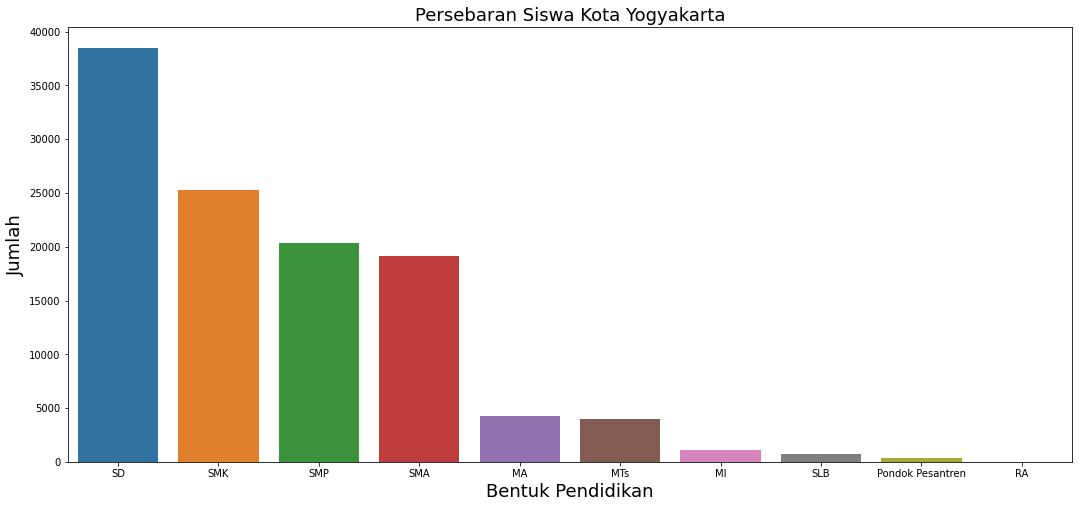

In [27]:
count = peserta_didik_kota_yogyakarta['bentuk_pendidikan'].value_counts()

index = count.index 
values = count.values 

fig = plt.figure(figsize = (18,  8))
sns.barplot(data=peserta_didik_kota_yogyakarta, x=index, y=values)
plt.title("Persebaran Siswa Kota Yogyakarta", fontsize=18)
plt.xlabel("Bentuk Pendidikan", fontsize=18)
plt.ylabel("Jumlah", fontsize=18)

plt.show()

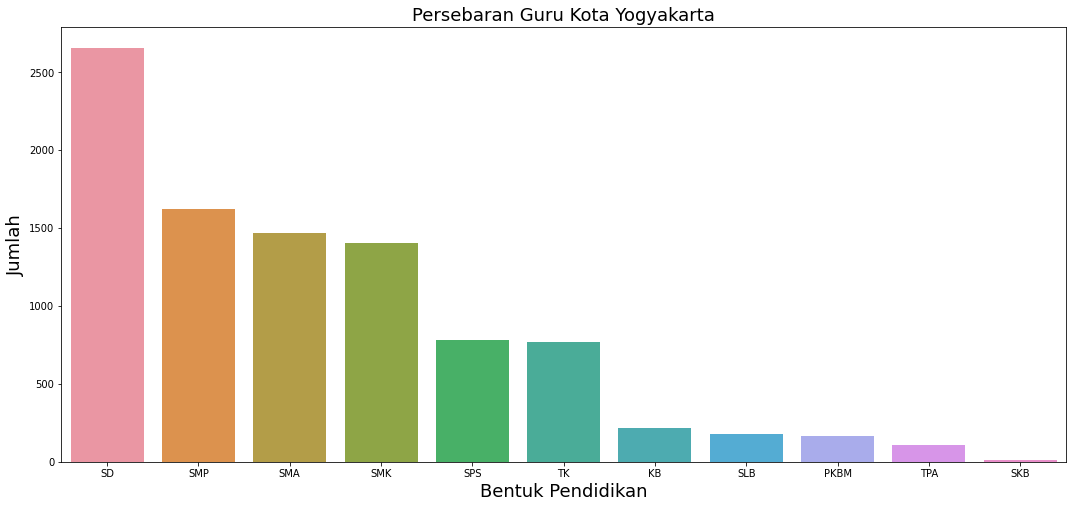

In [28]:
count = ptk_kota_yogyakarta['bentuk_pendidikan'].value_counts()

index = count.index 
values = count.values 

fig = plt.figure(figsize = (18,  8))
sns.barplot(data=ptk_kota_yogyakarta, x=index, y=values)
plt.title("Persebaran Guru Kota Yogyakarta", fontsize=18)
plt.xlabel("Bentuk Pendidikan", fontsize=18)
plt.ylabel("Jumlah", fontsize=18)

plt.show()

Perbandingan Guru - Siswa Jogja berdasarkan bentuk pendidikan (kurang lebih)
SD = 2600 : 39000 = 1 : 15
SMP = 1600 : 20000 = 1 : 13
SMA = 1500 : 19000 = 1 : 13
SMK = 1400 : 25000 = 1 : 18